In [1]:
import matplotlib.pyplot as plt

from cellori.applications.spots import data
from cellori.cellori import CelloriSpots
from cellori.utils.metrics import SpotsMetrics

In [2]:
ds = data.load_datasets('datasets/rajlab/naveen_scan_test.npz')['test']

In [3]:
i = 0
image = ds['images'][i:i + 1]
true_coords = ds['coords'][i]

In [4]:
model = CelloriSpots()

In [5]:
coords, y = model.predict(image)

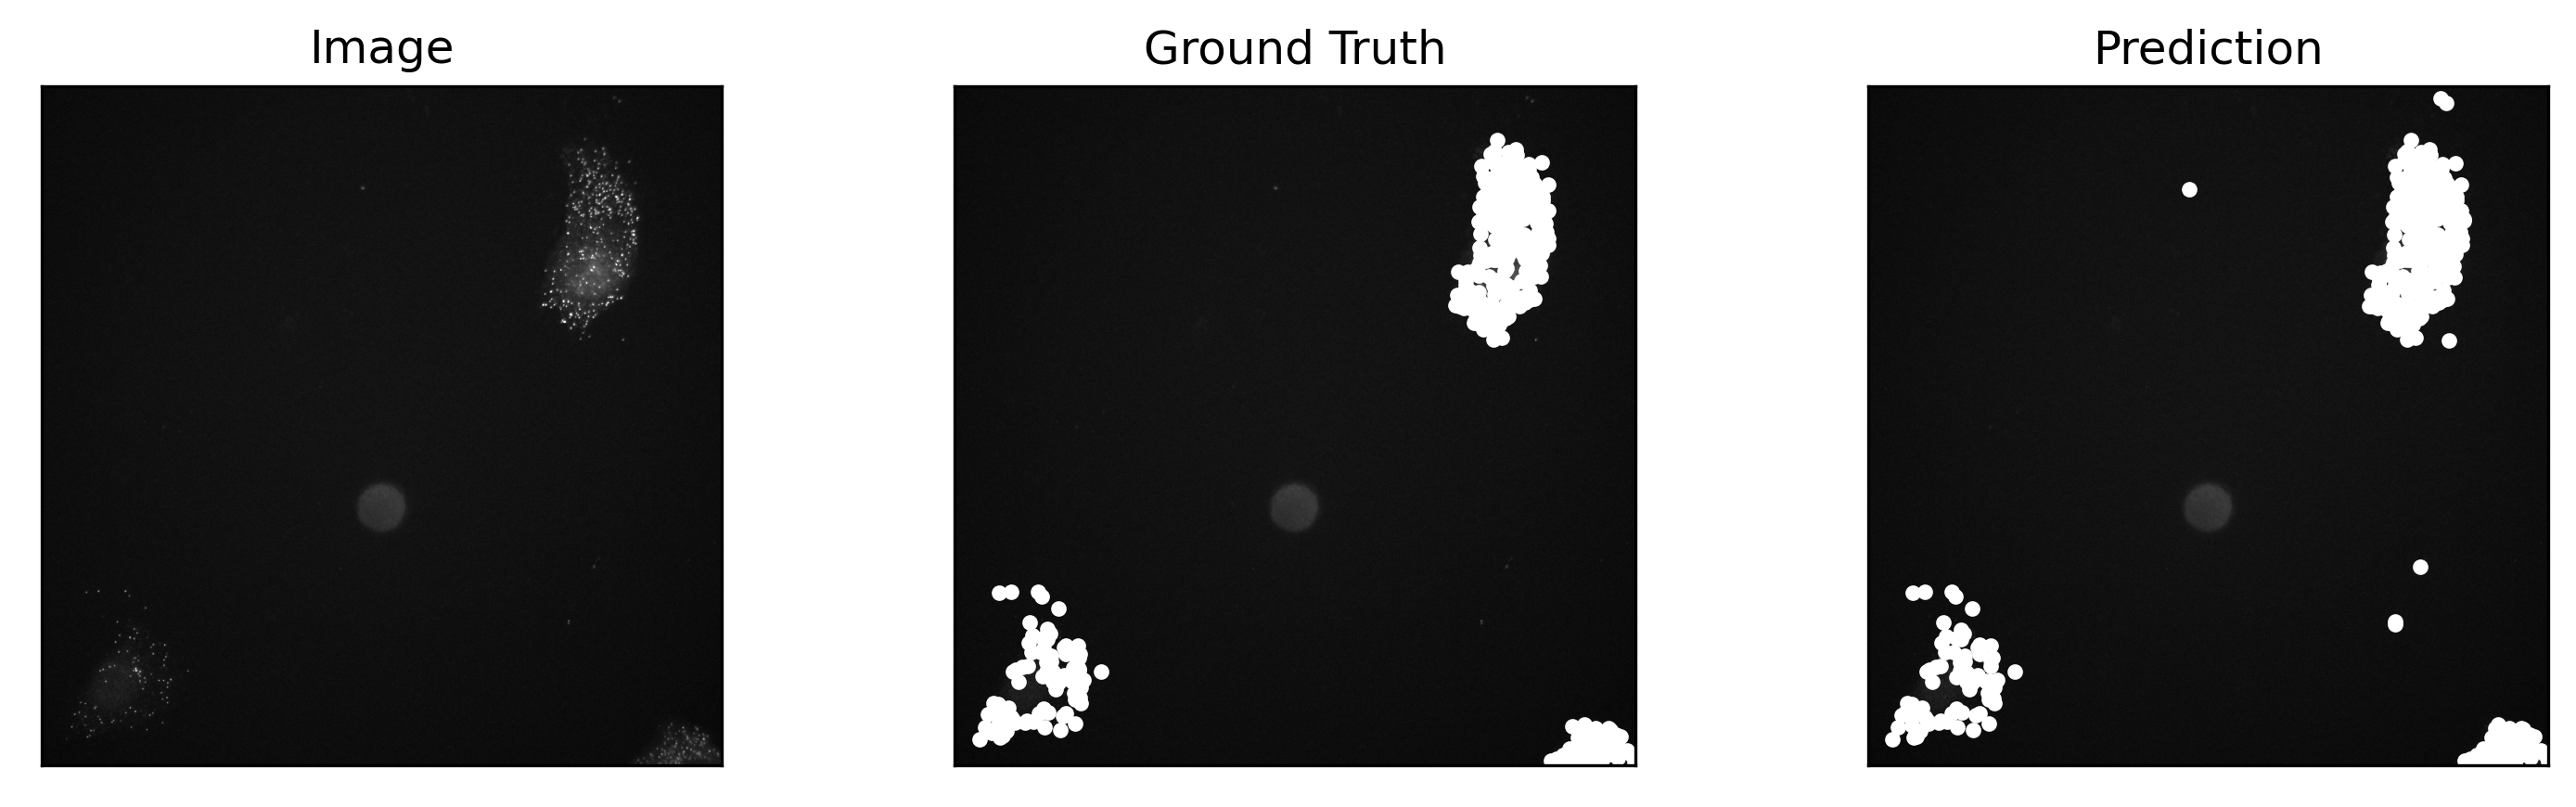

In [6]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, dpi=300, figsize=(10, 3))
ax[0].imshow(image[0], cmap='gray', vmin=0, vmax=0.5)
ax[1].imshow(image[0], cmap='gray', vmin=0, vmax=0.5)
ax[2].imshow(image[0], cmap='gray', vmin=0, vmax=0.5)
ax[1].plot(true_coords[:, 1], true_coords[:, 0], '.', c='white')
ax[2].plot(coords[:, 1], coords[:, 0], '.', c='white')
ax[0].set_title('Image')
ax[1].set_title('Ground Truth')
ax[2].set_title('Prediction')
for a in ax:
    a.get_xaxis().set_ticks([])
    a.get_yaxis().set_ticks([])
plt.tight_layout()

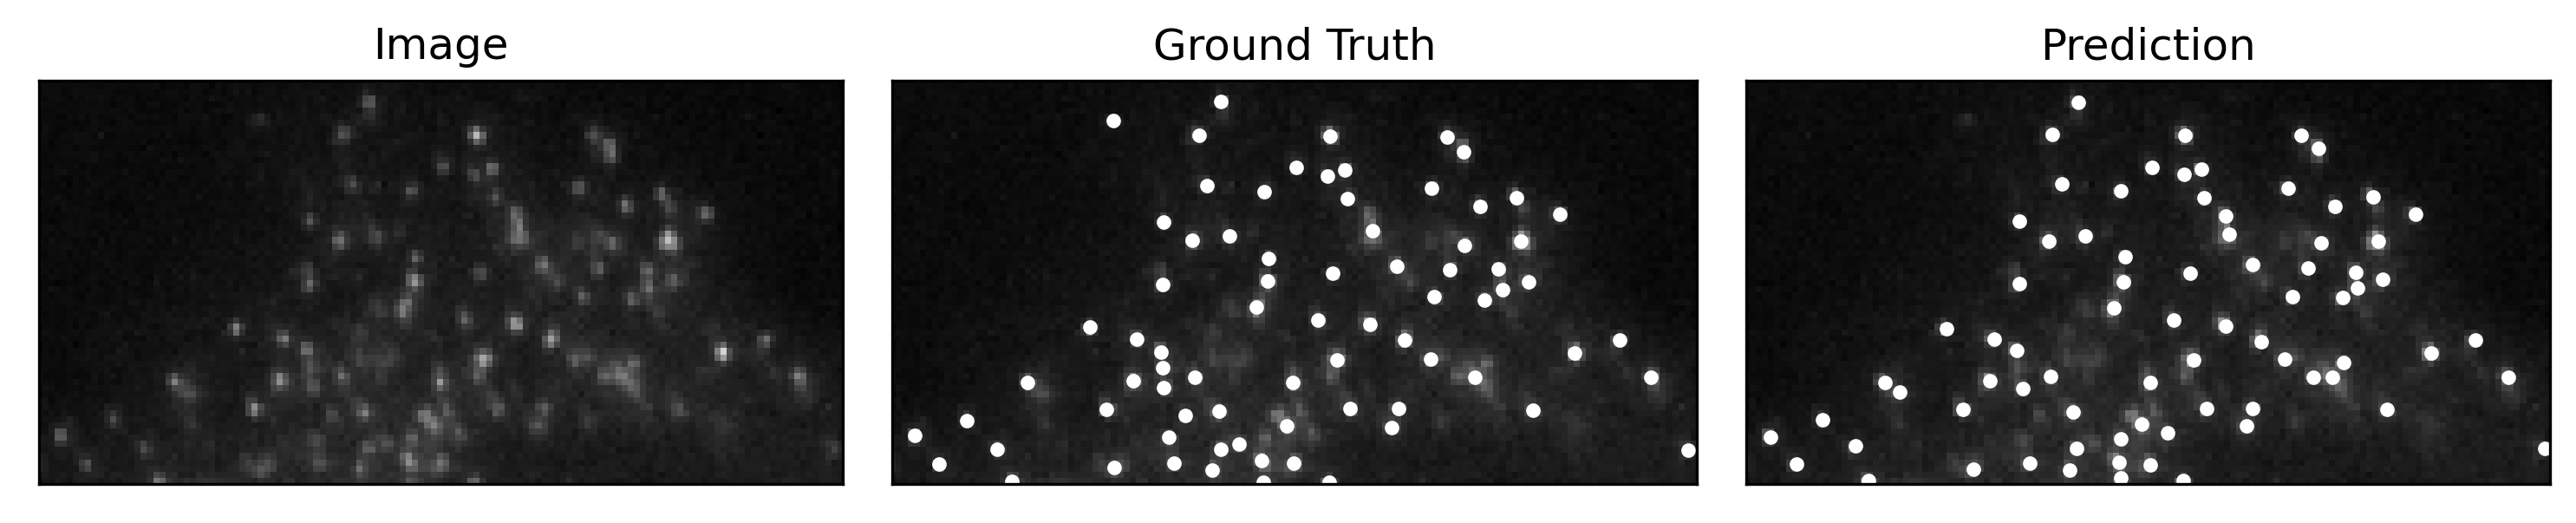

In [7]:
ax[0].set_xlim(893, 1023.5)
ax[0].set_ylim(1021.5, 956)
display(fig)

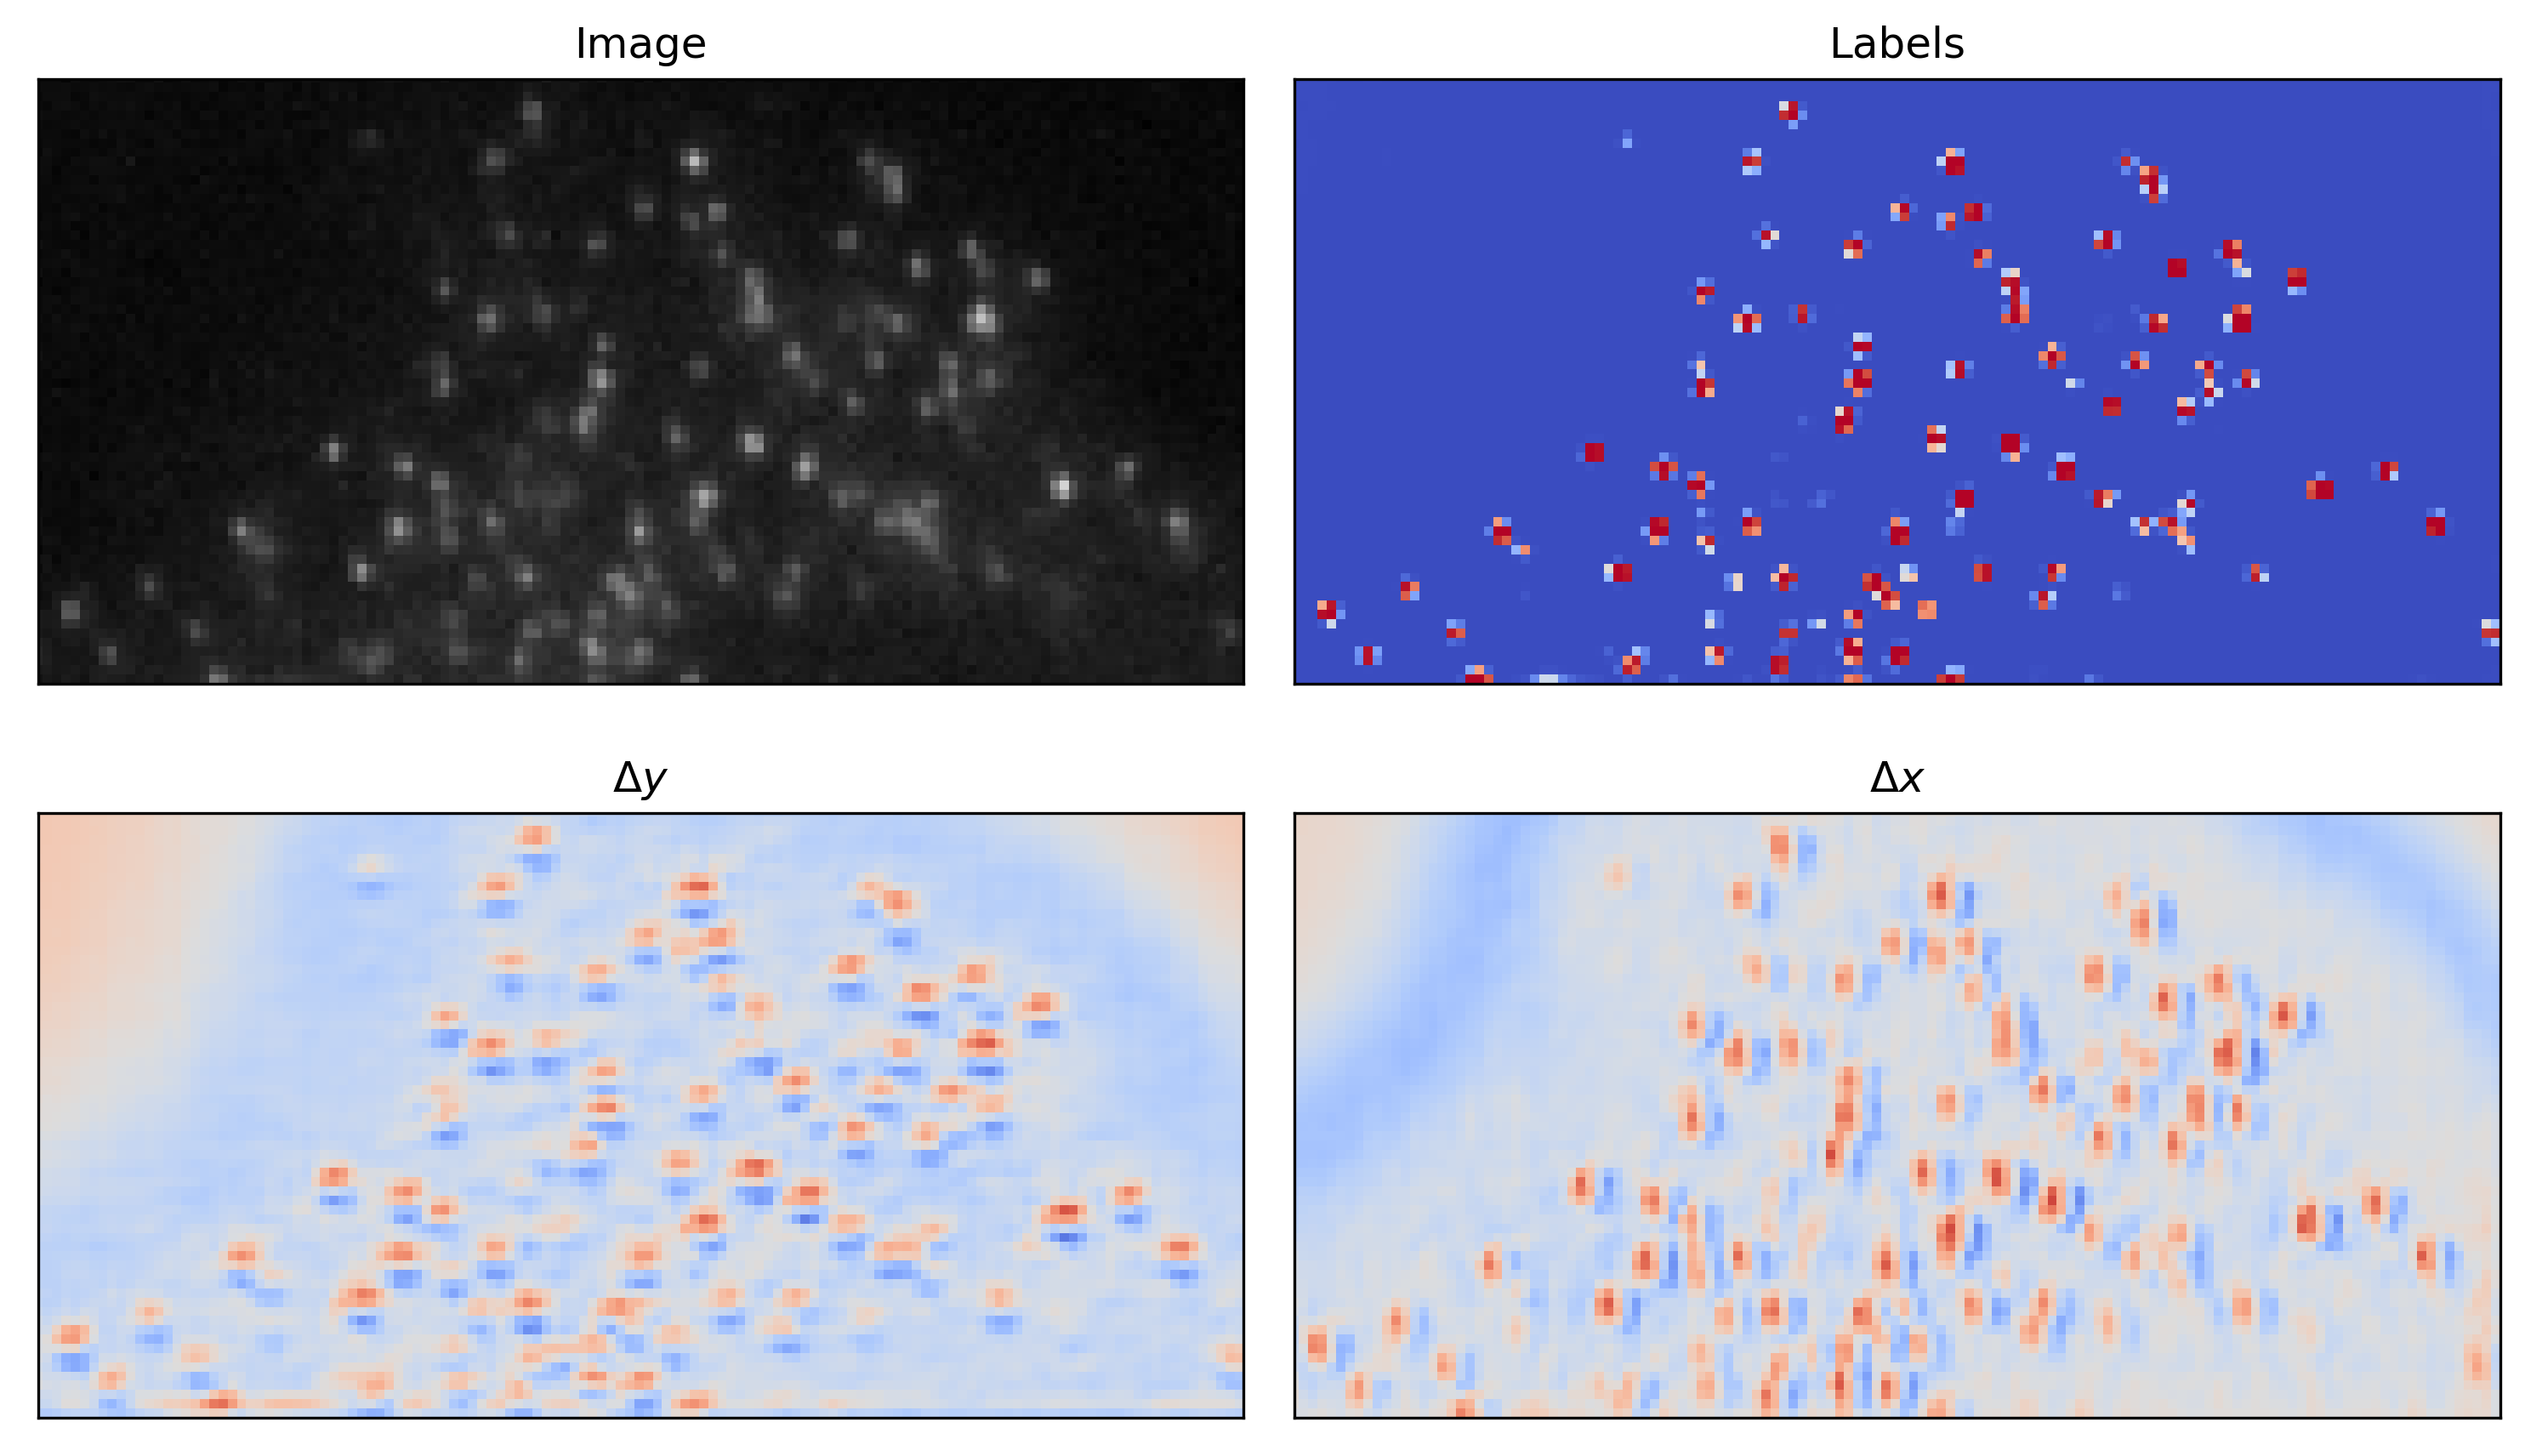

In [8]:
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True, dpi=300, figsize=(10, 6))
ax = ax.ravel()
ax[0].imshow(image[0], cmap='gray', vmin=0, vmax=0.5)
ax[1].imshow(y[2], cmap='coolwarm')
ax[2].imshow(y[0], cmap='coolwarm')
ax[3].imshow(y[1], cmap='coolwarm')
ax[0].set_title('Image')
ax[1].set_title('Labels')
ax[2].set_title('$\Delta y$')
ax[3].set_title('$\Delta x$')
for a in ax:
    a.get_xaxis().set_ticks([])
    a.get_yaxis().set_ticks([])
ax[0].set_xlim(893, 1023.5)
ax[0].set_ylim(1021.5, 956)
plt.tight_layout()

In [9]:
metrics = SpotsMetrics(true_coords, coords)
f1 = metrics.calculate('f1', 'l2', 1.5)
print(f'F1 Score: {f1}')

F1 Score: 0.9425028184892897
